# CLUSTRING Library tutorial

This notebook demonstrates how to use my self-made clustering library. We will cover:

1. **Working with Data Structures** - Covering the Datastructures of my library that allow clustering to work properly.
2. **k-NN Algorithm Implementation** - Training the model and making predictions. Plotting the results with matplotlib
3. **K-Mean Algorithm Implementation** - Also training the model, making predictions and plotting the results with matplotlib

---

In [1]:
# install:

from clustering.basic_data_structures.data_points import DataPoints
from clustering.basic_data_structures.labeled_data_points import LabeledDataPoints
from clustering.method_classes.k_means import KMeans
from clustering.method_classes.k_nn import KNN
import matplotlib.pyplot as plt

# Working with Data Structures

The Library containes two Datastructures: `DataPoints` and `LabeledDataPoints`

`Data Points` is used to store Data vectors. The data is stored as a list of lists, where:

where each list represents a data point (float)

data = [p1, p2, p3, ..., pn]

where p1 = [x1, x2, x3, ..., xk] and len(p1) = len(p2) = len(p3) = ... = len(pn)

You can acess and iterate over the data just like a normal list of lists

In [2]:
data_raw = [
    [4, 21],
    [5, 19],
    [4, 17],
    [3, 16],
    [8, 22],
    [10, 24],
    [11, 25],
    [14, 24],
    [10, 21],
    [12, 21]
]
data_points = DataPoints(data_raw)

it is also possible to initialize Data Points with a given list of Variables. To do so use `reverse=True`

In [3]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data_points = DataPoints([x, y], reverse=True)

Class `LabeledDataPoints` stores classified DataPoints as a Dictionary of DataPoints.

Can be initialized as:

1. list of Variables with classes attatched to it. Here `classes[0]` is the label for point `(x[0], y[0])`

In [4]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

data = LabeledDataPoints([x, y], labels=classes)

2. a Dictionary of a list of vectors, where a vector is one point

In [5]:
data_raw = {0: [
    [4, 21],
    [5, 19],
    [4, 17],
    [3, 16],
    [8, 22]
], 1: [
    [10, 24],
    [11, 25],
    [14, 24],
    [10, 21],
    [12, 21]
]}
data = LabeledDataPoints(data_raw)

3. Datapoints with classes attatched. Here `classes[0]` is the label for `data_points[0]`

In [6]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

data_points = DataPoints([x, y], reverse=True)

data = LabeledDataPoints(data_points, labels=classes)

# Training a K-NN Model

1. Initialize the knn model by giving an argument data of type `LabeledDataPoints`
2. execute `.fit()` function with parameter k

In [7]:
knn = KNN(data)
knn.fit(k=3)

3. initialize data points you want to classify

In [8]:
new_point = [8, 21]
new_points_data = DataPoints([new_point])

4. make a prediction using `predict` function

In [9]:
prediction = knn.predict(new_points_data)
print(prediction)

[0]


Example plot of the classification:

C:\Users\A. Romanenko\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  if sys.path[0] == "":


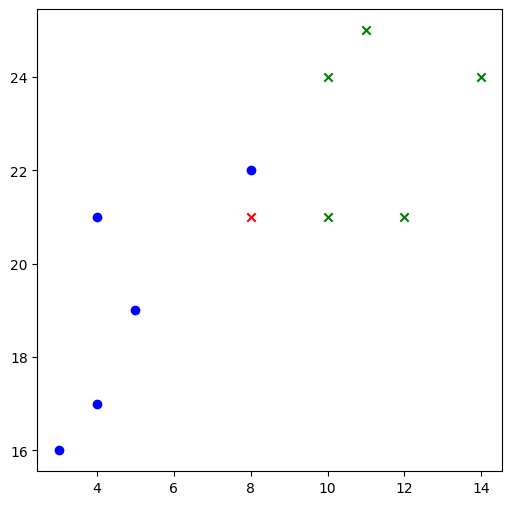

In [10]:
x_0 = [x[i] for i in range(len(x)) if classes[i] == 0]
y_0 = [y[i] for i in range(len(y)) if classes[i] == 0]

x_1 = [x[i] for i in range(len(x)) if classes[i] == 1]
y_1 = [y[i] for i in range(len(y)) if classes[i] == 1]

plt.figure(figsize=(6, 6))
plt.scatter(x_0, y_0, marker='o', label='Class 0', color='blue')
plt.scatter(x_1, y_1, marker='x', label='Class 1', color='green')

marker = "o" if prediction == 0 else "x"
plt.scatter(new_point[0], new_point[1], marker=marker, color='red', edgecolor='black')

plt.show()


# Training a K-Means model

1. initializing the data of type DataPoints

In [11]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = DataPoints([x, y], reverse=True)


2. Training the model by providing the number of wished classes and Maximum of iteration

In [12]:
knn = KMeans(data)
points = knn.fit(k=3, max_iter=100)

The Output of the `fit` function of an Object of type `labeledDataPoints`.

Lets plot the results!

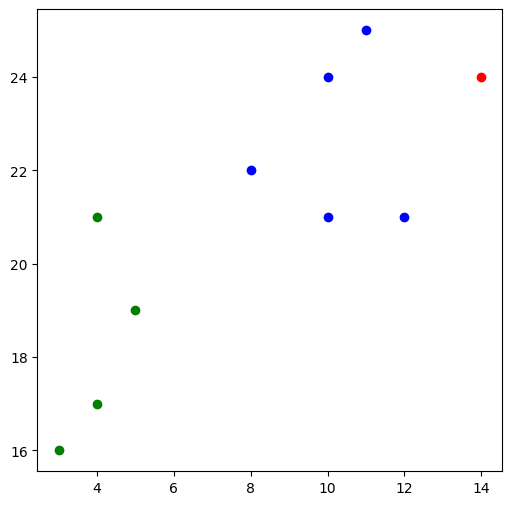

In [13]:
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

for key in points:
    x_0 = [points[key][i][0] for i in range(len(points[key]))]
    y_0 = [points[key][i][1] for i in range(len(points[key]))]

    plt.scatter(x_0, y_0, color=colors[key])
    
plt.show()
